# Imports

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

Instructions for updating:
non-resource variables are not supported in the long term


# Load data

In [2]:
train = pd.read_csv("/home/sanjana/Documents/DSML/Data sets/Human Activity Recognition/train.csv")
test = pd.read_csv("/home/sanjana/Documents/DSML/Data sets/Human Activity Recognition/test.csv")

# Data Exploration and Visualization

In [3]:
train.shape, test.shape

((7352, 563), (2947, 563))

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
tBodyAcc-std()-Z,7352.0,-0.604754,0.418687,-1.000000,-0.980233,-0.859365,-0.262415,1.000000
tBodyAcc-mad()-X,7352.0,-0.630512,0.424073,-1.000000,-0.993591,-0.950709,-0.292680,1.000000
tBodyAcc-mad()-Y,7352.0,-0.526907,0.485942,-1.000000,-0.978162,-0.857328,-0.066701,0.967664
tBodyAcc-mad()-Z,7352.0,-0.606150,0.414122,-1.000000,-0.980251,-0.857143,-0.265671,1.000000
tBodyAcc-max()-X,7352.0,-0.468604,0.544547,-1.000000,-0.936219,-0.881637,-0.017129,1.000000


In [6]:
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in test : ', test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in test :  0


In [7]:
train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [8]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

We can classify the activities into 2 categories:
1. Passive Activities - Standing, Sitting, Laying
2. Active Activities - Walking, Walking_Downstairs, Walking_Upstairs

In [9]:
pd.crosstab(train.subject, train.Activity, margins=True)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


The above table shows that the activities are nearly equally distributed among the various subjects.

[Text(0, 0, 'STANDING'),
 Text(0, 0, 'SITTING'),
 Text(0, 0, 'LAYING'),
 Text(0, 0, 'WALKING'),
 Text(0, 0, 'WALKING_DOWNSTAIRS'),
 Text(0, 0, 'WALKING_UPSTAIRS')]

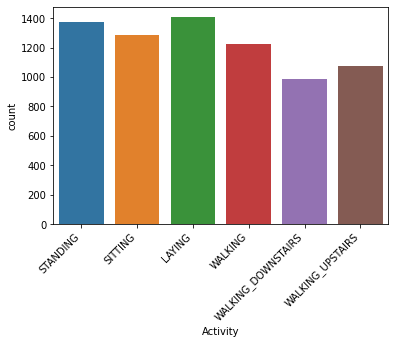

In [10]:
chart = sns.countplot(x=train['Activity'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

There are almost the same number of observations per activity and hence the data does not suffer from class imbalance problem.

In [11]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

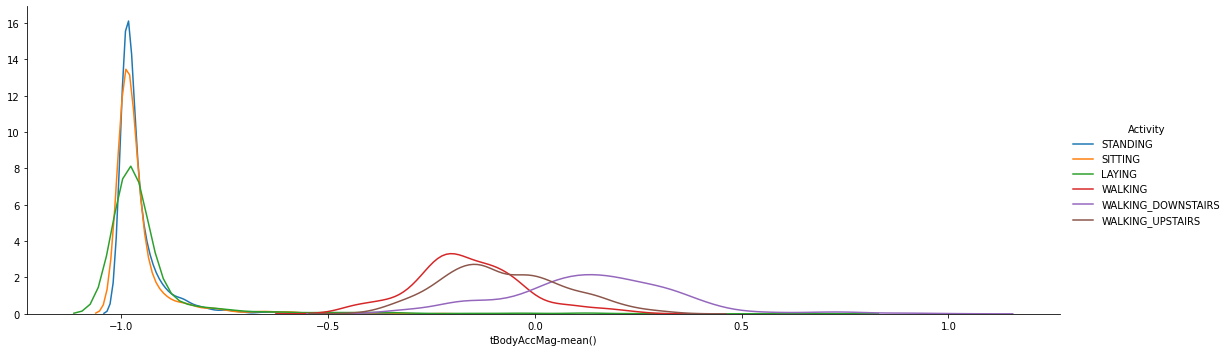

In [12]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()

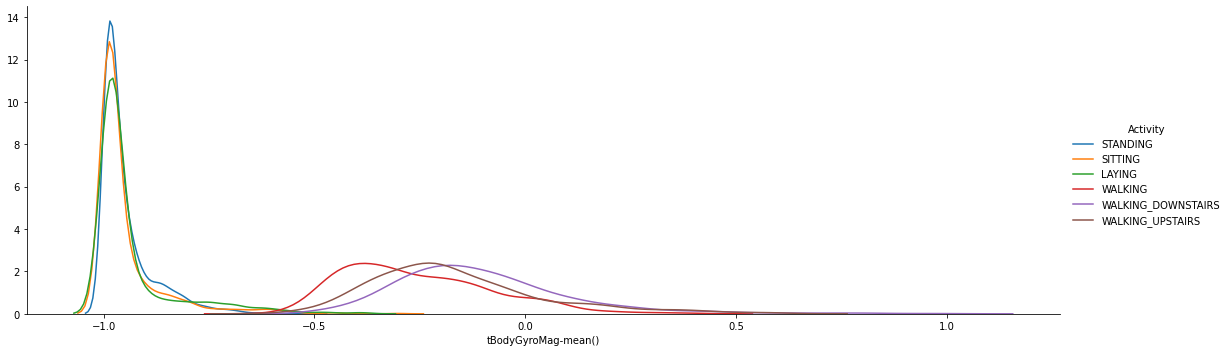

In [13]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyGyroMag-mean()', hist=False).add_legend()

Using the above density plot we can easily come up with a condition to seperate static activities from dynamic activities.

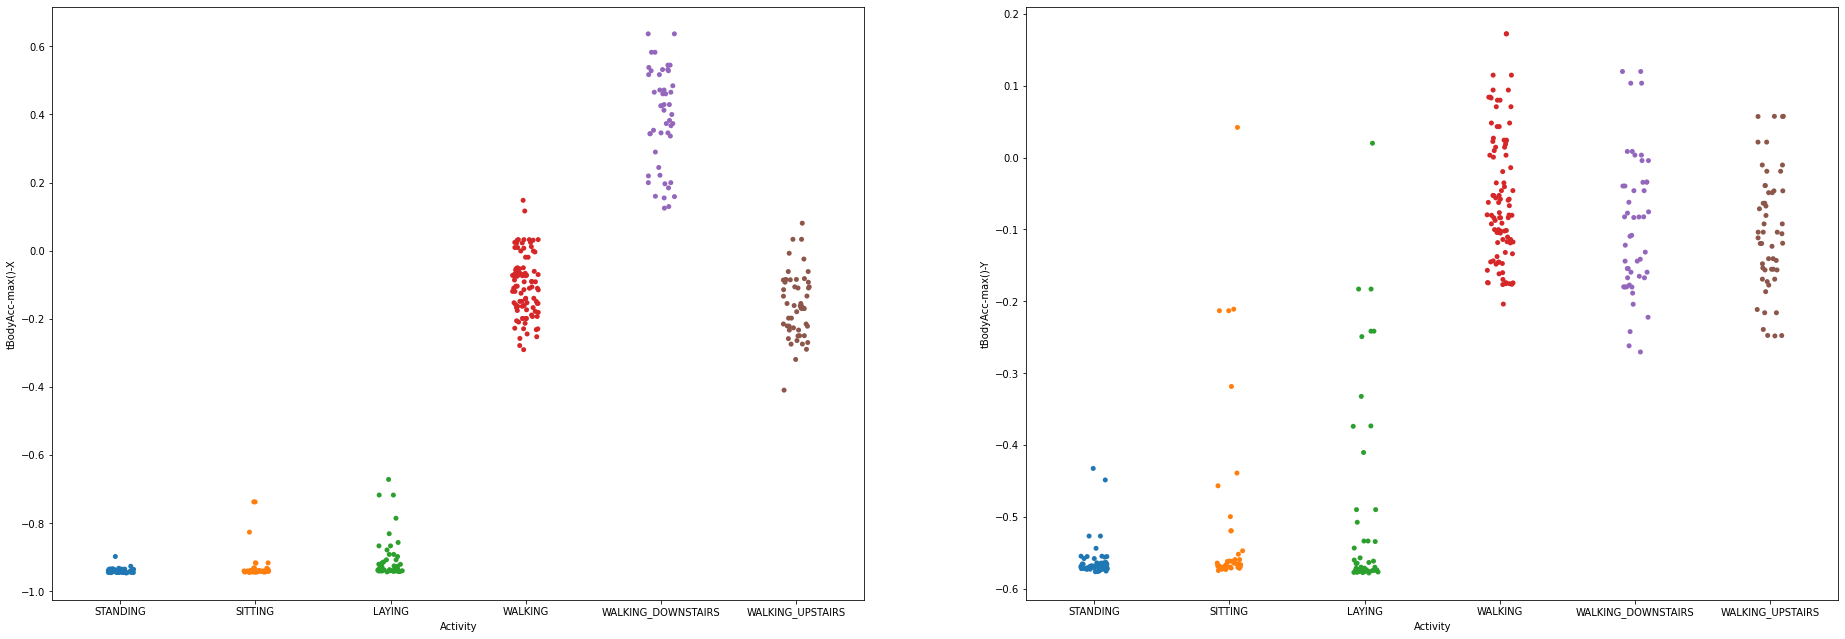

In [14]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y='tBodyAcc-max()-X', data=train.loc[train['subject']==1], jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y='tBodyAcc-max()-Y', data=train.loc[train['subject']==1], jitter=True)
plt.show()

Passive activities fall mostly below the active ones. It makes sense that maximum acceleration is higher during the walking activities. 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

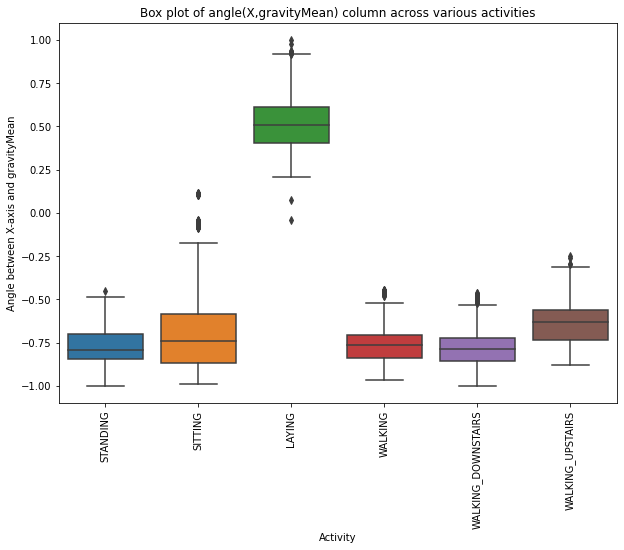

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train)
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

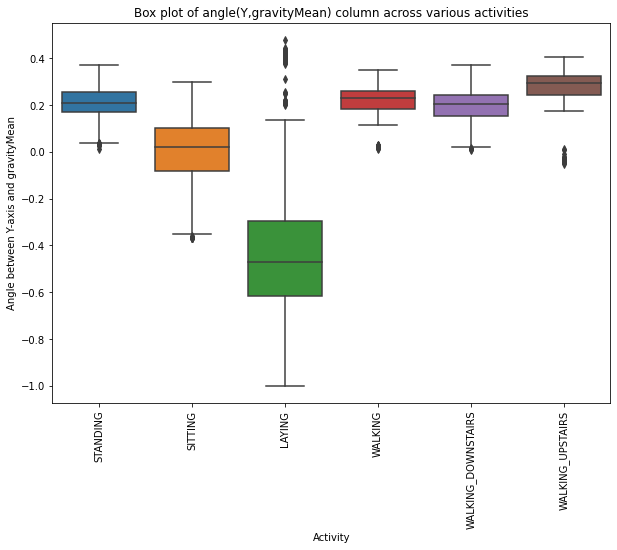

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)

The above 2 plots seperate the laying activity from the others based on the angle made by gravityMean with X and Y axis respectively.

# Data Preprocessing

In [17]:
train.drop(['subject'], axis=1, inplace=True)
test.drop(['subject'], axis=1, inplace=True)

In [18]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [19]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train = pd.get_dummies(y_train).values

y_test = encoder.fit_transform(y_test)
y_test = pd.get_dummies(y_test).values

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352, 6), (2947, 561), (2947, 6))

In [21]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Model using Keras

In [22]:
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=6, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                35968     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 48,614
Trainable params: 48,614
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history=model.fit(X_train, y_train, batch_size=256, epochs=20, validation_data=(X_test, y_test), shuffle=True)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 0s 29us/sample - loss: 1.3856 - acc: 0.3973 - val_loss: 0.9453 - val_acc: 0.7017
Epoch 2/20
7352/7352 [==============================] - 0s 21us/sample - loss: 0.8811 - acc: 0.6420 - val_loss: 0.5683 - val_acc: 0.8327
Epoch 3/20
7352/7352 [==============================] - 0s 27us/sample - loss: 0.6492 - acc: 0.7299 - val_loss: 0.4693 - val_acc: 0.8103
Epoch 4/20
7352/7352 [==============================] - 0s 24us/sample - loss: 0.5130 - acc: 0.7969 - val_loss: 0.3368 - val_acc: 0.8887
Epoch 5/20
7352/7352 [==============================] - 0s 26us/sample - loss: 0.4439 - acc: 0.8211 - val_loss: 0.3370 - val_acc: 0.8388
Epoch 6/20
7352/7352 [==============================] - 0s 27us/sample - loss: 0.3802 - acc: 0.8524 - val_loss: 0.2553 - val_acc: 0.9084
Epoch 7/20
7352/7352 [==============================] - 0s 22us/sample - loss: 0.3311 - acc: 0.8723 - val_loss: 0.2247 - val_acc: 

<function matplotlib.pyplot.show(*args, **kw)>

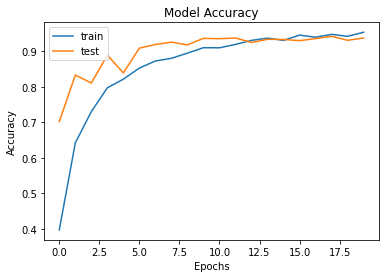

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

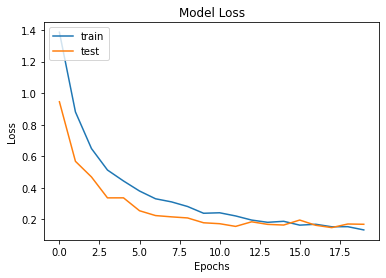

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [26]:
y_pred = model.predict(X_test)

In [27]:
pred = np.argmax(y_pred,axis = 1) 
y_actual = np.argmax(y_test,axis = 1)

In [28]:
confusion_matrix(y_actual, pred)

array([[536,   0,   1,   0,   0,   0],
       [  1, 409,  80,   0,   0,   1],
       [  0,  15, 517,   0,   0,   0],
       [  0,   0,   0, 490,   3,   3],
       [  0,   0,   0,  11, 378,  31],
       [  0,   0,   0,  39,   1, 431]])

In [29]:
print(classification_report(y_actual, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.83      0.89       491
           2       0.86      0.97      0.92       532
           3       0.91      0.99      0.95       496
           4       0.99      0.90      0.94       420
           5       0.92      0.92      0.92       471

    accuracy                           0.94      2947
   macro avg       0.94      0.93      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [30]:
results = pd.DataFrame({'Actual':y_actual, 'Predicted':pred})
results.iloc[:75,:]

,Actual,Predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


# Build Model using Tensorflow

In [31]:
tf.reset_default_graph()

In [32]:
n_input = 561
n_hidden1 = 64
n_hidden2 = 128
n_hidden3 = 32
n_output = 6

In [33]:
x = tf.placeholder(tf.float32, shape=[None, 561])
y = tf.placeholder(tf.float32, shape=[None, 6])
hold_prob = tf.placeholder(tf.float32)

In [34]:
def init_weights(shape):
    w = tf.truncated_normal(shape=shape, stddev=0.1)
    return tf.Variable(w)

In [35]:
def init_bias(shape):
    b = tf.constant(0.1, shape=shape)
    return tf.Variable(b)

In [36]:
def next_batch(j, batch_size):
    x = X_train[j:j+batch_size]
    y = y_train[j:j+batch_size]
    j = (j+batch_size)%len(X_train)
    return x,y,j

In [37]:
hidden1 = {'weights':init_weights([n_input,n_hidden1]), 'bias':init_bias([n_hidden1])}
hidden2 = {'weights':init_weights([n_hidden1, n_hidden2]), 'bias':init_bias([n_hidden2])}
hidden3 = {'weights':init_weights([n_hidden2, n_hidden3]), 'bias':init_bias([n_hidden3])}
output = {'weights':init_weights([n_hidden3, n_output]), 'bias':init_bias([n_output])}

In [38]:
def feed_forward(x):
    h1 = tf.add(tf.matmul(x,hidden1['weights']), hidden1['bias'])
    h1 = tf.nn.relu(h1)
    
    h2 = tf.add(tf.matmul(h1,hidden2['weights']), hidden2['bias'])
    h2 = tf.nn.relu(h2)
    
    h3 = tf.add(tf.matmul(h2,hidden3['weights']), hidden3['bias'])
    h3 = tf.nn.relu(h3)
    
    dropout = tf.nn.dropout(h3, hold_prob)
    
    out = tf.matmul(dropout,output['weights']) +output['bias']
    out = tf.nn.softmax(out)
    
    return out

In [39]:
y_pred = feed_forward(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [40]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_pred))

In [41]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [42]:
init = tf.global_variables_initializer()

In [43]:
epochs = 5000
j = 0
batch_size = 256
train_acc = []
test_acc = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        x_batch, y_batch, j = next_batch(j, batch_size)
        sess.run(train, feed_dict={x:x_batch, y:y_batch, hold_prob:0.5})
        
        if (i % 100 == 0 and i != 0):
            print('Epoch', i, 'completed out of', epochs)
            correct = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
            trainacc = sess.run(accuracy, feed_dict = {x: x_batch, y: y_batch, hold_prob:0.5})
            print('Train set Accuracy:', trainacc)
            train_acc.append(trainacc)
            testacc = sess.run(accuracy, feed_dict = {x: X_test, y: y_test, hold_prob:1.0})
            print('Test set Accuracy:', testacc)
            test_acc.append(testacc)
            print()

Epoch 100 completed out of 5000
Train set Accuracy: 0.67578125
Test set Accuracy: 0.69765866

Epoch 200 completed out of 5000
Train set Accuracy: 0.828125
Test set Accuracy: 0.84221244

Epoch 300 completed out of 5000
Train set Accuracy: 0.83984375
Test set Accuracy: 0.80624366

Epoch 400 completed out of 5000
Train set Accuracy: 0.91796875
Test set Accuracy: 0.88394976

Epoch 500 completed out of 5000
Train set Accuracy: 0.765625
Test set Accuracy: 0.7536478

Epoch 600 completed out of 5000
Train set Accuracy: 0.95703125
Test set Accuracy: 0.9063454

Epoch 700 completed out of 5000
Train set Accuracy: 0.91015625
Test set Accuracy: 0.8836104

Epoch 800 completed out of 5000
Train set Accuracy: 0.859375
Test set Accuracy: 0.8720733

Epoch 900 completed out of 5000
Train set Accuracy: 0.96484375
Test set Accuracy: 0.9267051

Epoch 1000 completed out of 5000
Train set Accuracy: 0.9609375
Test set Accuracy: 0.86935866

Epoch 1100 completed out of 5000
Train set Accuracy: 0.90625
Test set A

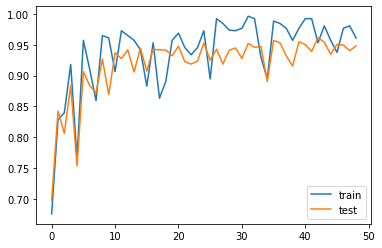

In [44]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['train','test'])